In [1]:
import sys
import numpy as np
import cv2
# 이미지 읽어 들이기 --- (※ 1)
im = cv2.imread('numbers.PNG')

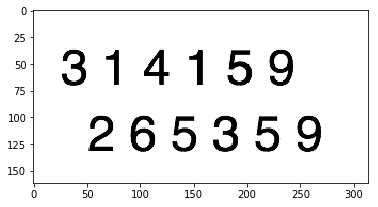

In [2]:
# Will use matplotlib for showing the image
from matplotlib import pyplot as plt
%matplotlib inline

# Plot
# cv2.imshow('image',im) 대용
plt.imshow(im) 

In [3]:
# 그레이스케일로 변환하고 블러를 걸고 이진화하기 --- (※2)
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)

In [4]:
# 윤곽 추출하기 --- (※3)
contours = cv2.findContours(
  thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[1]

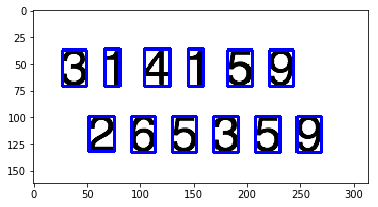

In [5]:
# 추출한 윤곽을 반복 처리하기 --- (※4)
for cnt in contours:
  x, y, w, h = cv2.boundingRect(cnt) # --- (※5)
  if h < 20: continue # 너무 작으면 건너뛰기
  red = (0, 0, 255)
  cv2.rectangle(im, (x, y), (x+w, y+h), red, 2)

# cv2.imwrite('numbers-cnt.PNG', im)
plt.imshow(im) 